IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


DATA COLLECTION AND PROCESSING


In [ ]:
 #LODING THE DATA TO A PANDAS DATAFRAME
heart_data = pd.read_csv('/content/heart_disease_data.csv')


In [ ]:
#PRINT FIRST 5 ROWS OF THE DATASET
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#PRINT FIRST 5 ROWS OF THE DATASET
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#NUM OF ROWS AND COLOUMNS IN THE DATASET
heart_data.shape

(303, 14)

In [ ]:
#GETTING SOME INFO ABOUT THE DATA
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#CHECKING FOR MISSING VALUES
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#STATISTICAL MEASURES ABOUT DATA
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#CHECKING THE DISTRIBUTION OF TARGET VARIABLES
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 -> DEFECTIVE HEART

0 -> HEALTHY HEART

SPLITTING THE FEATURES ABD TARGET

In [ ]:
x = heart_data.drop(columns='target',axis=1)
y = heart_data['target']

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


#EDA


<Axes: xlabel='target', ylabel='count'>

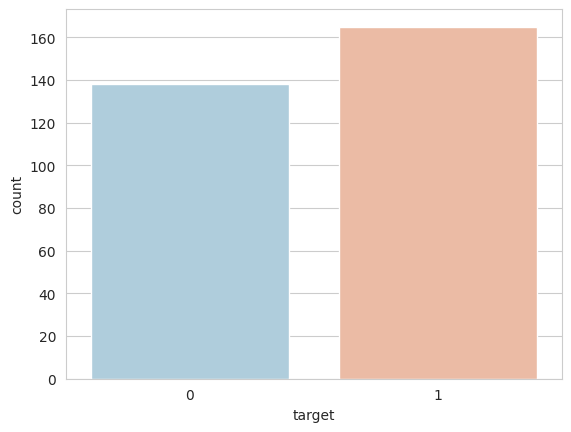

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target', data = heart_data, palette='RdBu_r')

([<matplotlib.axis.XTick at 0x793a4a2f8940>,
 [Text(1, 0, 'Male'), Text(0, 0, 'Female')])

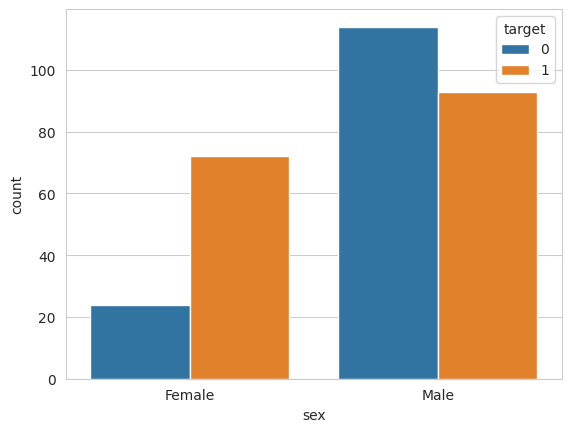

In [ ]:
sns.countplot(x='sex', hue='target', data=heart_data)
plt.xticks([1,0], ['Male', 'Female'])

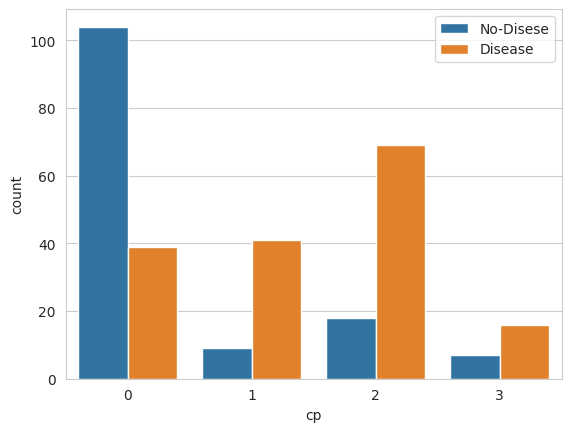

In [ ]:
sns.countplot(x="cp", hue="target", data=heart_data)
plt.legend(labels=["No-Disese", "Disease"])
plt.show()

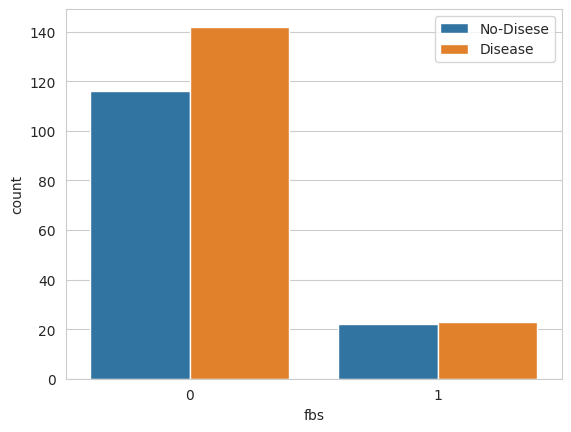

In [ ]:
sns.countplot(x="fbs", hue="target", data=heart_data)
plt.legend(labels=["No-Disese", "Disease"])
plt.show()

SPLITTING THE DATA INTO TRANING AND TEST DATA


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


MODEL TRAINING


LOGISTIC REGRASSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODEL EVALUATION

ACCURACY SCORE


In [ ]:
#ACCURACY ON TRAINING DATA
from sklearn.metrics import accuracy_score
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print('accuracy on training data : ',training_data_accuracy)

accuracy on training data :  0.8512396694214877


In [ ]:
#ACCURACY ON TEST DATA
from sklearn.metrics import accuracy_score
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [ ]:
print('accuracy on test data : ',test_data_accuracy)

accuracy on test data :  0.819672131147541


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
test_data_accuracy =mean_squared_error(x_test_prediction,y_test)
test_data_accuracy =mean_absolute_error(x_test_prediction,y_test)
test_data_accuracy =r2_score(x_test_prediction,y_test)

BUILDING A PREDICTIVE DATA

In [ ]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#CHANGE THE INPUT DATA TO NUMPY ARRAY
input_data_as_numpy_array =np.asarray(input_data)


#RESHAPE THE NUMPY ARRAY AS WE ARE PREDICTIING FOR ONLY ON INSTANCE
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('the person does not have a heart disease')
else:
  print('that the person has heart disease')

[1]
that the person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#CHANGE THE INPUT DATA TO NUMPY ARRAY
input_data_as_numpy_array =np.asarray(input_data)


#RESHAPE THE NUMPY ARRAY AS WE ARE PREDICTIING FOR ONLY ON INSTANCE
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('the person does not have a heart disease')
else:
  print('that the person has heart disease')

[0]
the person does not have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'heart_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loading_model = pickle.load(open('heart_model.sav', 'rb'))